In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from Coeffs import *
import itertools
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

# $ u \bar{u}\to t \bar{t}$, $|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [81]:
#data

eft_u_cs = [(1.669e-4,1.796e-7), (2.062e-4,2.829e-7), (2.602e-4,3.329e-7),
           (3.407e-4,4.053e-7), (4.633e-4,5.203e-7), (6.666e-4,3.473e-7), (1.042e-3,1.112e-6),
           (1.856e-3,2.087e-6), (2.666e-3,2.974e-6),
            (4.168e-3,3.817e-6), (7.412e-3,9.328e-6), (1.1067e-2,1.245e-5),
            (1.667e-2,1.541e-5), (2.059e-2,2.015e-5),
           (2.603e-2, 2.828e-5), (3.405e-2,3.448e-5), (4.634e-2,3.409e-5), (6.677e-2,6.8e-5),
           (1.043e-1,1.079e-4), (1.852e-1,1.776e-4), (4.165e-1,406e-4)] #pb

uv_u_cs = [(1.674e-04,6.0e-07), (2.053e-4,8.5e-7), (2.610e-4, 1.1e-6),
          (3.392e-4,1.4e-6), (4.641e-4,1.3e-6), (6.688e-4,2.8e-6), (1.041e-3, 4.3e-6),
          (1.867e-3,7.7e-6), (2.690e-3,1.1e-5),
           (4.221e-3,1.7e-5),(7.585e-3,3.2e-5), (1.111e-2,4.1e-5),
           (1.788e-2,7.7e-5), (2.255e-2,9.7e-5), 
           (2.899e-2,1.1e-4), (3.9e-2,1.6e-4), (5.494e-2,2.2e-4), (8.239e-2,3.8e-4),
          (1.3556e-1,6.3e-4), (2.504e-1,1.1e-3), (4.433e-1,2.3e-3)] #pb

m_SDM = np.array([9.5, 8.55, 7.6, 6.65, 5.7, 4.75, 3.8, 2.85, 2.375, 1.9, 1.425, 1.1875, 0.95, 0.855, 0.76, 0.665,
        0.57, 0.475, 0.38, 0.285, 0.19]) #TeV

m_psiT = np.array([10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.5, 2.0, 1.5, 1.25, 1.0, 0.9, 0.8, 0.7,
         0.6, 0.5, 0.4, 0.3, 0.2]) #TeV

In [82]:
#Getting the points
pts_u_eft = []
err_u_eft = []
pts_u_uv = []
err_u_uv = []
for i,cs in enumerate(eft_u_cs):
    pts_u_eft.append(cs[0])
    err_u_eft.append(cs[1])
    pts_u_uv.append(uv_u_cs[i][0])
    err_u_uv.append(uv_u_cs[i][1])

pts_u_eft = np.array(pts_u_eft)
err_u_eft = np.array(err_u_eft)
pts_u_uv = np.array(pts_u_uv)
err_u_uv = np.array(err_u_uv)

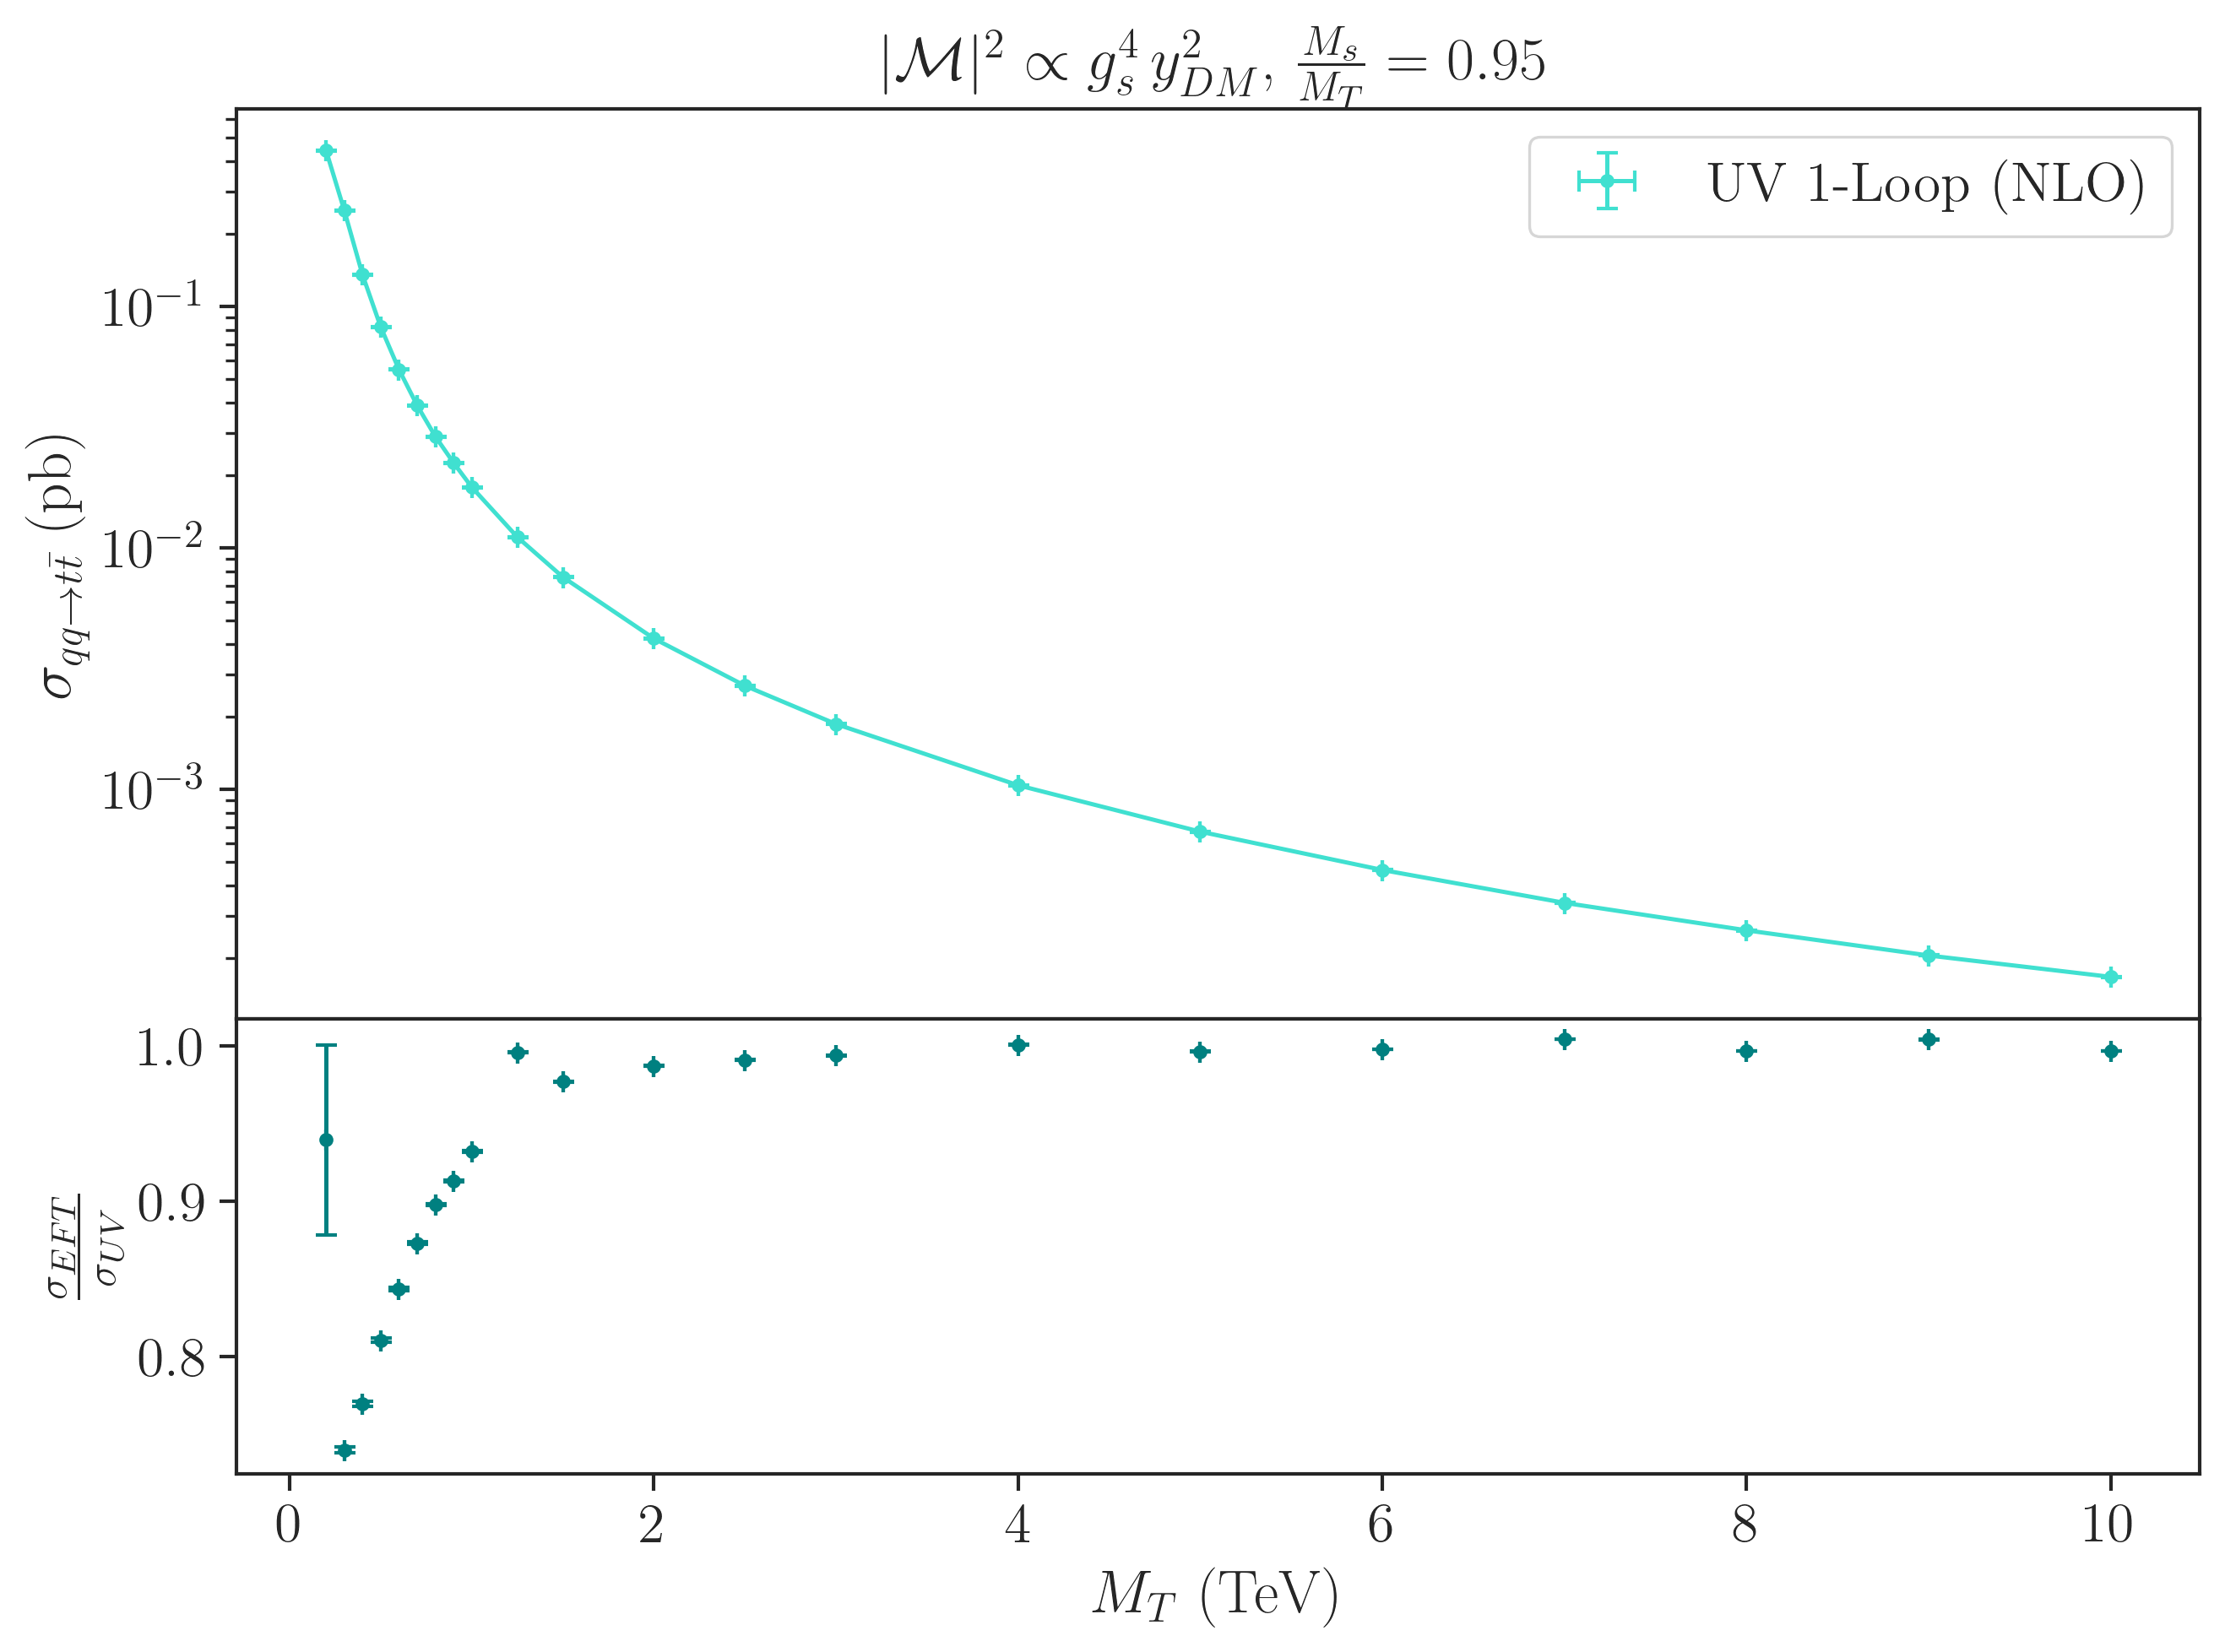

In [85]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 4])
axs = gs.subplots(sharex=True)

#Gráfico principal
#axs[0].errorbar(m_psiT,pts_u_eft,err_u_eft, 0, 'o', ms = 3.0, capsize=3, 
 #               color = 'royalblue', label = 'EFT' )
axs[0].plot(m_psiT,pts_u_uv, ms = 3.0, 
                color = 'Turquoise')
axs[0].errorbar(m_psiT,pts_u_uv,err_u_uv,0, 'o', ms = 3.0, capsize=3, 
               color = 'Turquoise', label = 'UV 1-Loop (NLO)' )
axs[0].set_ylabel(r'$\sigma_{qq\to t\bar{t}}$ (pb)')
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_s}{M_T} = 0.95$ ')
axs[0].set_yscale('log')


#Gráfico de resíduos
diff = (pts_u_eft )/pts_u_uv
err = np.sqrt(pts_u_eft*(err_u_uv/pts_u_uv)**2 + (1/pts_u_uv) * err_u_eft**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_psiT,diff,err,0, 'o', ms = 3.0, capsize=3, 
                color = 'teal', label = 'EFT - UV 1-Loop' )
#axs[1].axhline(y=0.1, color='k', linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$')
#axs[1].set_ylim([-1,1])

#axs[1].set_yscale('log')


plt.xlabel(r'$M_{T}$ (TeV)')
#plt.xticks(np.arange(0,11,1))

plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/qq2ttbar_CS.png')
plt.show()

# $ g g\to t \bar{t}$, $|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [86]:
#data

eft_g_cs = [(0.00018092,2.56e-07), (0.000223,2.348e-07), (0.0002826,2.487e-07), (0.0003686,3.82e-07),
           (0.0005025,5.449e-07), (0.0007234,9.169e-07), (0.001131,1.095e-06), (0.002007,2.008e-06),
           (0.002897,3.084e-06), (0.004522,6.208e-06), (0.008041,1.199e-05), (0.01159,9.141e-06),
            (0.01811,2.672e-05), (0.02241,2.79e-05), (0.02829,2.256e-05),
           (0.03695,4.09e-05), (0.05017,7.216e-05), (0.07241,9.639e-05), (0.113,0.0001294),
           (0.2009,0.0001763), (0.4518,0.0004421)] #pb 

uv_g_cs = [(1.612e-04,2.9e-06), (2.242e-04,1.1e-06), (2.817e-04,1.4e-06), (3.699e-04,1.6e-06),
          (5.028e-04,2.2e-06), (7.231e-04,3.6e-06), (1.134e-03,5.3e-06), (2.037e-03,9.4e-06),
          (2.920e-03,1.3e-05),(4.625e-03,2.0e-05), (8.299e-03, 3.5e-05), (1.218e-02,5.3e-05),
           (1.956e-02,8.7e-05), (2.452e-02,1.0e-04), (3.197e-02,1.4e-04),
          (4.363e-02,1.8e-04), (6.222e-02,2.5e-04), (9.940e-02,4.1e-04), (1.801e-01,7.4e-04),
          (4.085e-01,1.7e-03), (9.650e-01,5.6e-03)] #pb

m_SDM3 = [9.5, 8.55, 7.6, 6.65, 5.7, 4.75, 3.8, 2.85, 2.375, 1.9, 1.425, 1.1875, 0.95, 0.855, 0.76, 0.665, 0.57,
         0.475, 0.38, 0.285, 0.19] #TeV

m_psiT3 = [10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.5, 2.0, 1.5, 1.25, 1.0, 0.9, 0.8, 0.7, 0.6,
          0.5, 0.4, 0.3, 0.2] #TeV

In [87]:
#Getting the points
pts_g_eft = []
err_g_eft = []
pts_g_uv = []
err_g_uv = []
for i,cs in enumerate(eft_g_cs):
    pts_g_eft.append(cs[0])
    err_g_eft.append(cs[1])
    pts_g_uv.append(uv_g_cs[i][0])
    err_g_uv.append(uv_g_cs[i][1])

pts_g_eft = np.array(pts_g_eft)
err_g_eft = np.array(err_g_eft)
pts_g_uv = np.array(pts_g_uv)
err_g_uv = np.array(err_g_uv)

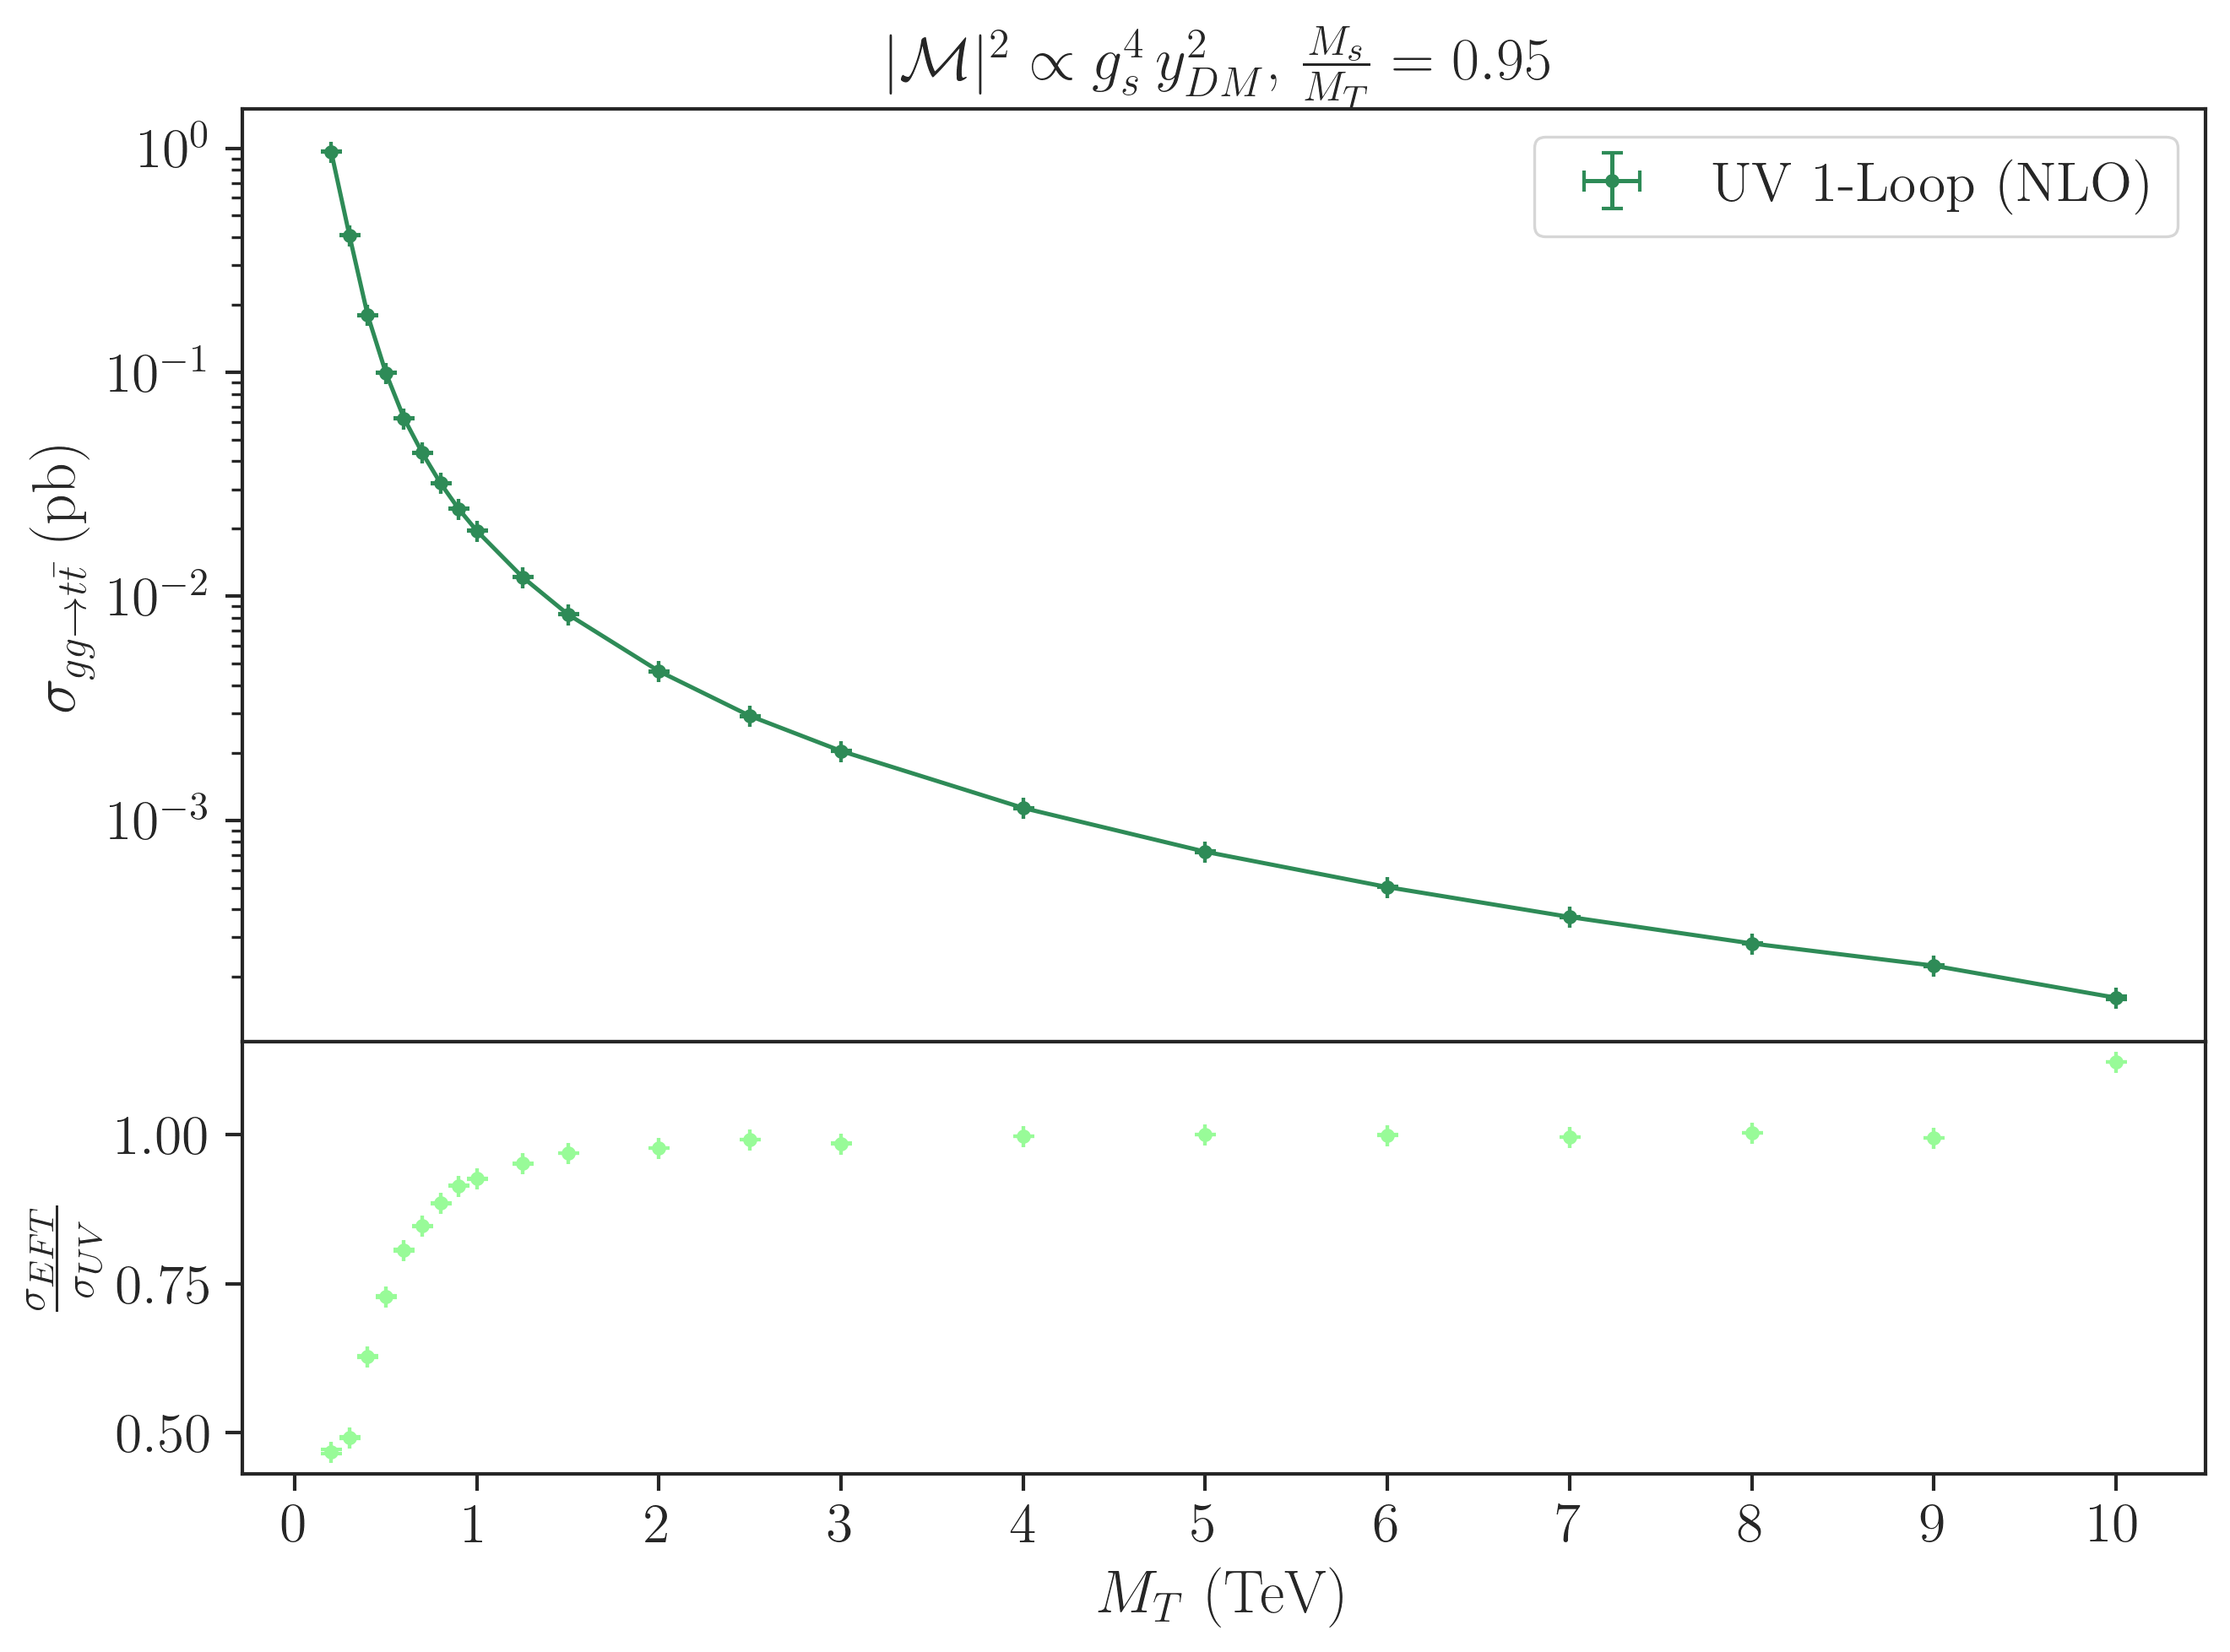

In [92]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 3.7])
axs = gs.subplots(sharex=True)

#Gráfico principal
#axs[0].errorbar(m_psiT3,pts_g_eft,err_g_eft, 0, 'o', ms = 3.0, capsize=3, 
 #               color = 'brown', label = 'EFT' )
axs[0].errorbar(m_psiT3,pts_g_uv,err_g_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'seagreen', label = 'UV 1-Loop (NLO)' )
axs[0].plot(m_psiT3,pts_g_uv, ms = 3.0, 
                color = 'seagreen')
axs[0].set_ylabel(r'$\sigma_{gg\to t\bar{t}}$ (pb)')
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_s}{M_T} = 0.95$   ')
axs[0].set_yscale('log')


#Gráfico de resíduos
diff1 = (pts_g_eft )/pts_g_uv
err1 = np.sqrt(pts_g_eft*(err_g_uv/pts_g_uv)**2 + (1/pts_g_uv) * err_g_eft**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_psiT3,diff1,err1,0, 'o', ms = 3.0, capsize=3, 
                color = 'palegreen', label = 'EFT - UV 1-Loop' )
#axs[1].plot(m_psiT3,diff1,
 #               color = 'palegreen', label = 'EFT - UV 1-Loop' )
#axs[1].axhline(y=0.1, color='k', linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$')
#axs[1].set_ylim([-1,1])

#axs[1].set_yscale('log')


plt.xlabel(r'$M_{T}$ (TeV)')
plt.xticks(np.arange(0,11,1))

plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/gg2ttbar_CS.png')
plt.show()